### Single layer BiLSTM - IMDB

In [62]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import random

import pandas as pd
import numpy as np
import csv
import json

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0PCA0/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0PCA0/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteC0PCA0/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 65s 142ms/step - loss: 0.5391 - accuracy: 0.7230 - val_loss: 0.5174 - val_accuracy: 0.7845
Epoch 2/10
391/391 [==============================] - 55s 140ms/step - loss: 0.4164 - accuracy: 0.8222 - val_loss: 0.4648 - val_accuracy: 0.8066
Epoch 3/10
391/391 [==============================] - 56s 141ms/step - loss: 0.3086 - accuracy: 0.8784 - val_loss: 0.3882 - val_accuracy: 0.8430
Epoch 4/10
391/391 [==============================] - 56s 141ms/step - loss: 0.2475 - accuracy: 0.9079 - val_loss: 0.4229 - val_accuracy: 0.8096
Epoch 5/10
391/391 [==============================] - 56s 142ms/step - loss: 0.3892 - accuracy: 0.8268 - val_loss: 0.6314 - val_accuracy: 0.6572
Epoch 6/10
391/391 [==============================] - 56s 142ms/step - loss: 0.5216 - accuracy: 0.7355 - val_loss: 0.6122 - val_accuracy: 0.6668
Epoch 7/10
391/391 [==============================] - 56s 141ms/step - loss: 0.4958 - accuracy: 0.7545 - val_loss: 0.6010 - val_ac

In [11]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

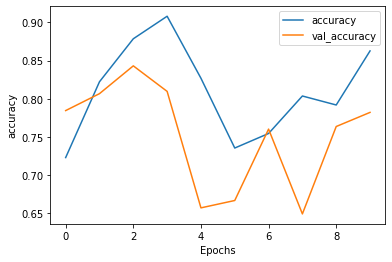

In [14]:
plot_graphs(history, 'accuracy')

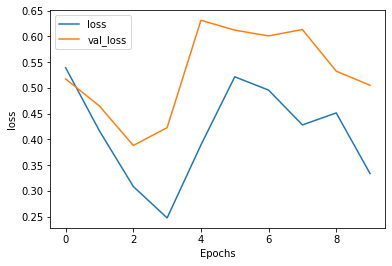

In [15]:
plot_graphs(history, 'loss')

### Multi layer BiLSTM - IMDB

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 108s 263ms/step - loss: 0.5595 - accuracy: 0.7119 - val_loss: 0.4479 - val_accuracy: 0.8069
Epoch 2/10
391/391 [==============================] - 104s 266ms/step - loss: 0.3994 - accuracy: 0.8303 - val_loss: 0.5411 - val_accuracy: 0.7464
Epoch 3/10
391/391 [==============================] - 104s 265ms/step - loss: 0.4690 - accuracy: 0.7804 - val_loss: 0.4729 - val_accuracy: 0.8001
Epoch 4/10
391/391 [==============================] - 104s 265ms/step - loss: 0.3827 - accuracy: 0.8388 - val_loss: 0.4494 - val_accuracy: 0.8118
Epoch 5/10
391/391 [==============================] - 104s 266ms/step - loss: 0.2766 - accuracy: 0.8918 - val_loss: 0.4226 - val_accuracy: 0.8299
Epoch 6/10
391/391 [==============================] - 105s 267ms/step - loss: 0.2042 - accuracy: 0.9231 - val_loss: 0.3855 - val_accuracy: 0.8484
Epoch 7/10
391/391 [==============================] - 105s 267ms/step - loss: 0.1533 - accuracy: 0.9457 - val_loss: 0.4054 -

In [20]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

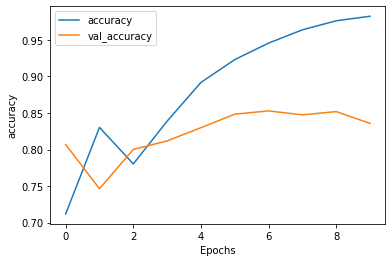

In [21]:
plot_graphs(history, 'accuracy')

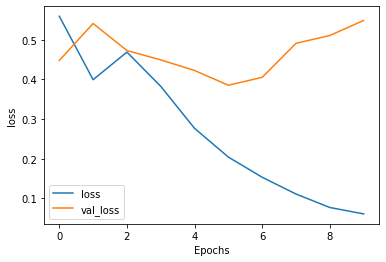

In [22]:
plot_graphs(history, 'loss')

### Conv1D - IMDB

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 67s 104ms/step - loss: 0.4446 - accuracy: 0.7828 - val_loss: 0.3039 - val_accuracy: 0.8770
Epoch 2/10
391/391 [==============================] - 21s 51ms/step - loss: 0.2231 - accuracy: 0.9161 - val_loss: 0.2979 - val_accuracy: 0.8792
Epoch 3/10
391/391 [==============================] - 19s 46ms/step - loss: 0.1668 - accuracy: 0.9388 - val_loss: 0.3418 - val_accuracy: 0.8666
Epoch 4/10
391/391 [==============================] - 17s 43ms/step - loss: 0.1343 - accuracy: 0.9530 - val_loss: 0.3839 - val_accuracy: 0.8612
Epoch 5/10
391/391 [==============================] - 17s 42ms/step - loss: 0.1080 - accuracy: 0.9634 - val_loss: 0.4386 - val_accuracy: 0.8637
Epoch 6/10
391/391 [==============================] - 17s 41ms/step - loss: 0.0875 - accuracy: 0.9708 - val_loss: 0.4875 - val_accuracy: 0.8520
Epoch 7/10
391/391 [==============================] - 17s 42ms/step - loss: 0.0666 - accuracy: 0.9794 - val_loss: 0.5620 - val_accuracy

In [27]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

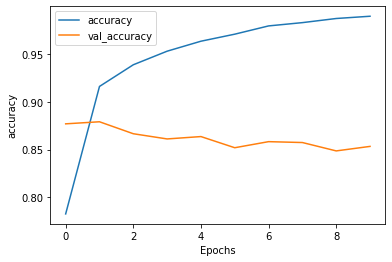

In [28]:
plot_graphs(history, 'accuracy')

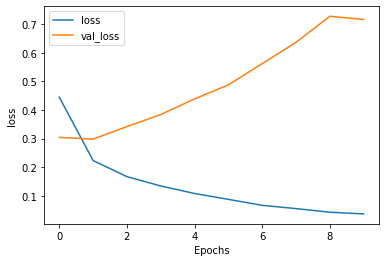

In [29]:
plot_graphs(history, 'loss')

## IMDB - Flatten

In [30]:
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT8HBH1/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT8HBH1/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteT8HBH1/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [31]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())
  
for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())
  
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [32]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [37]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.4959 - accuracy: 0.7460 - val_loss: 0.3465 - val_accuracy: 0.8511
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.2393 - accuracy: 0.9059 - val_loss: 0.3688 - val_accuracy: 0.8408
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0909 - accuracy: 0.9778 - val_loss: 0.4617 - val_accuracy: 0.8224
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0219 - accuracy: 0.9976 - val_loss: 0.5339 - val_accuracy: 0.8240
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0050 - accuracy: 0.9997 - val_loss: 0.5950 - val_accuracy: 0.8269
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.6412 - val_accuracy: 0.8287
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 8.2752e-04 - accuracy: 1.0000 - val_loss: 0.6823 - val_accuracy: 0.8288
Ep

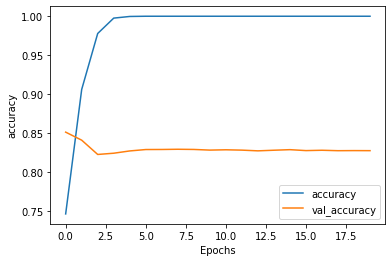

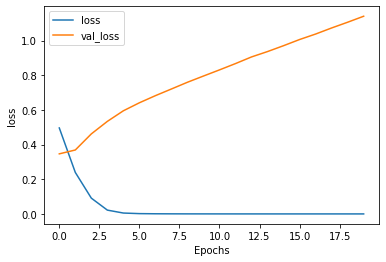

In [38]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## IMDB - BiGRU

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 64)                9600      
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 390       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [34]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 17s 18ms/step - loss: 0.5211 - accuracy: 0.7154 - val_loss: 0.4399 - val_accuracy: 0.7995
Epoch 2/20
782/782 [==============================] - 13s 16ms/step - loss: 0.3070 - accuracy: 0.8753 - val_loss: 0.4051 - val_accuracy: 0.8388
Epoch 3/20
782/782 [==============================] - 13s 16ms/step - loss: 0.2361 - accuracy: 0.9074 - val_loss: 0.3854 - val_accuracy: 0.8362
Epoch 4/20
782/782 [==============================] - 13s 17ms/step - loss: 0.1824 - accuracy: 0.9318 - val_loss: 0.4133 - val_accuracy: 0.8378
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1286 - accuracy: 0.9548 - val_loss: 0.4861 - val_accuracy: 0.8243
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.0929 - accuracy: 0.9678 - val_loss: 0.5856 - val_accuracy: 0.8209
Epoch 7/20
782/782 [==============================] - 13s 16ms/step - loss: 0.0674 - accuracy: 0.9771 - val_loss: 0.6529 - val_accuracy:

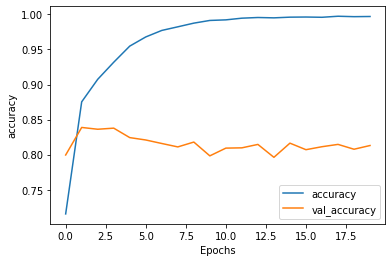

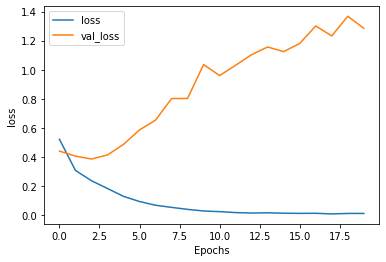

In [35]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## IMDB - BiLSTM

In [39]:
# Model Definition with LSTM
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 390       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 7         
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [40]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 17s 18ms/step - loss: 0.4752 - accuracy: 0.7664 - val_loss: 0.4181 - val_accuracy: 0.8274
Epoch 2/20
782/782 [==============================] - 13s 17ms/step - loss: 0.2983 - accuracy: 0.8788 - val_loss: 0.3720 - val_accuracy: 0.8293
Epoch 3/20
782/782 [==============================] - 14s 18ms/step - loss: 0.2319 - accuracy: 0.9110 - val_loss: 0.3870 - val_accuracy: 0.8191
Epoch 4/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1785 - accuracy: 0.9344 - val_loss: 0.4772 - val_accuracy: 0.8277
Epoch 5/20
782/782 [==============================] - 14s 18ms/step - loss: 0.1370 - accuracy: 0.9502 - val_loss: 0.5328 - val_accuracy: 0.8187
Epoch 6/20
782/782 [==============================] - 13s 17ms/step - loss: 0.1050 - accuracy: 0.9641 - val_loss: 0.6376 - val_accuracy: 0.8204
Epoch 7/20
782/782 [==============================] - 13s 17ms/step - loss: 0.0764 - accuracy: 0.9751 - val_loss: 0.7149 - val_accuracy:

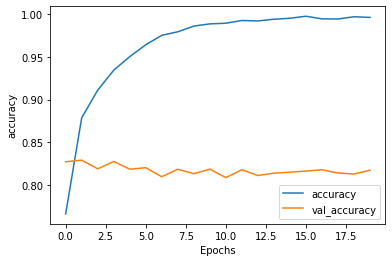

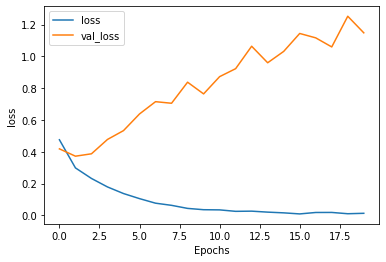

In [41]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## IMDB - Conv1D

In [42]:
# Model Definition with Conv1D
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 774       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 7         
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
_________________________________________________________________


In [43]:
num_epochs = 20
history = model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 0.4460 - accuracy: 0.7810 - val_loss: 0.3503 - val_accuracy: 0.8502
Epoch 2/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2800 - accuracy: 0.8849 - val_loss: 0.3592 - val_accuracy: 0.8441
Epoch 3/20
782/782 [==============================] - 6s 7ms/step - loss: 0.2296 - accuracy: 0.9102 - val_loss: 0.3895 - val_accuracy: 0.8371
Epoch 4/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1903 - accuracy: 0.9280 - val_loss: 0.4343 - val_accuracy: 0.8305
Epoch 5/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1598 - accuracy: 0.9424 - val_loss: 0.4701 - val_accuracy: 0.8260
Epoch 6/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1292 - accuracy: 0.9560 - val_loss: 0.5544 - val_accuracy: 0.8204
Epoch 7/20
782/782 [==============================] - 5s 7ms/step - loss: 0.1035 - accuracy: 0.9671 - val_loss: 0.6094 - val_accuracy: 0.8157
Epoch 

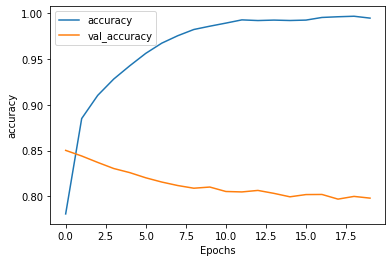

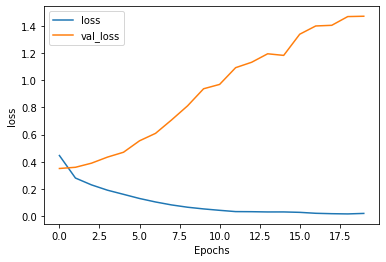

In [44]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Sarcasm - BiLSTM

In [45]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /content/sarcasm.json

--2021-08-06 06:49:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/content/sarcasm.json’

/content/sarcasm.js 100%[===================>]   5.38M  --.-KB/s    in 0.02s   

2021-08-06 06:49:40 (240 MB/s) - ‘/content/sarcasm.json’ saved [5643545/5643545]



In [46]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [47]:
with open("/content/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [48]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [49]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                12544     
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1560      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 30,129
Trainable params: 30,129
Non-trainable params: 0
_________________________________________________________________


In [51]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/20
625/625 [==============================] - 11s 14ms/step - loss: 0.4532 - accuracy: 0.7671 - val_loss: 0.3905 - val_accuracy: 0.8208
Epoch 2/20
625/625 [==============================] - 7s 12ms/step - loss: 0.3530 - accuracy: 0.8374 - val_loss: 0.3799 - val_accuracy: 0.8271
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 0.3291 - accuracy: 0.8499 - val_loss: 0.3837 - val_accuracy: 0.8208
Epoch 4/20
625/625 [==============================] - 7s 12ms/step - loss: 0.3131 - accuracy: 0.8599 - val_loss: 0.3742 - val_accuracy: 0.8311
Epoch 5/20
625/625 [==============================] - 7s 12ms/step - loss: 0.3040 - accuracy: 0.8648 - val_loss: 0.3736 - val_accuracy: 0.8319
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 0.2958 - accuracy: 0.8668 - val_loss: 0.3766 - val_accuracy: 0.8319
Epoch 7/20
625/625 [==============================] - 8s 12ms/step - loss: 0.2886 - accuracy: 0.8732 - val_loss: 0.3720 - val_accuracy: 0.832

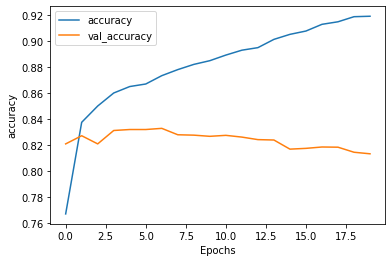

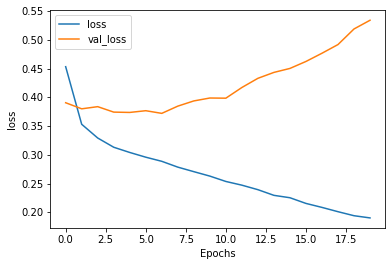

In [52]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Sarcasm - Conv1D

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________


In [54]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=1)

Epoch 1/20
625/625 [==============================] - 3s 4ms/step - loss: 0.4706 - accuracy: 0.7619 - val_loss: 0.4115 - val_accuracy: 0.8140
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3603 - accuracy: 0.8383 - val_loss: 0.3916 - val_accuracy: 0.8277
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 0.3206 - accuracy: 0.8594 - val_loss: 0.3942 - val_accuracy: 0.8278
Epoch 4/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2889 - accuracy: 0.8752 - val_loss: 0.4012 - val_accuracy: 0.8268
Epoch 5/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2569 - accuracy: 0.8914 - val_loss: 0.4195 - val_accuracy: 0.8204
Epoch 6/20
625/625 [==============================] - 2s 4ms/step - loss: 0.2253 - accuracy: 0.9089 - val_loss: 0.4549 - val_accuracy: 0.8201
Epoch 7/20
625/625 [==============================] - 2s 4ms/step - loss: 0.1926 - accuracy: 0.9244 - val_loss: 0.4923 - val_accuracy: 0.8146
Epoch 

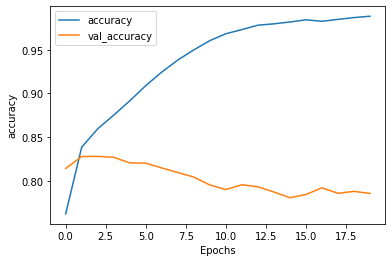

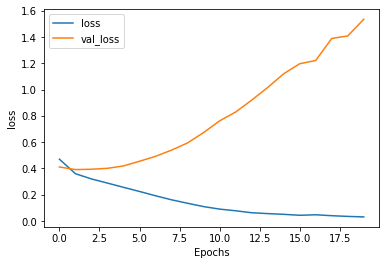

In [55]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

## Exercise 11

Running on Stanford dataset.

In [56]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /content/training_cleaned.csv

--2021-08-06 07:00:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.101.128, 142.250.141.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 238942690 (228M) [application/octet-stream]
Saving to: ‘/content/training_cleaned.csv’

/content/training_c 100%[===================>] 227.87M   157MB/s    in 1.5s    

2021-08-06 07:00:56 (157 MB/s) - ‘/content/training_cleaned.csv’ saved [238942690/238942690]



In [58]:
num_sentences = 0
corpus = []

with open("/content/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        list_item=[]
        list_item.append(row[5])
        this_label=row[0]
        if this_label=='0':
            list_item.append(0)
        else:
            list_item.append(1)
        num_sentences = num_sentences + 1
        corpus.append(list_item)

In [59]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [60]:
embedding_dim = 100
max_length = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size=160000
test_portion=.1

In [63]:
sentences=[]
labels=[]
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size=len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

split = int(test_portion * training_size)

test_sequences = padded[0:split]
training_sequences = padded[split:training_size]
test_labels = labels[0:split]
training_labels = labels[split:training_size]

In [64]:
print(vocab_size)
print(word_index['i'])

137960
1


In [66]:
# getting Glove

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /content/glove.6B.100d.txt

--2021-08-06 07:04:29--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2021-08-06 07:04:29 ERROR 404: Not Found.



In [67]:
embeddings_index = {};
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word = values[0];
        coefs = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [68]:
print(len(embeddings_matrix))

137961


In [70]:
training_padded = np.array(training_sequences)
training_labels = np.array(training_labels)
testing_padded = np.array(test_sequences)
testing_labels = np.array(test_labels)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 16, 100)           13796100  
_________________________________________________________________
dropout (Dropout)            (None, 16, 100)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 12, 64)            32064     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3, 64)             0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 13,861,253
Trainable params: 65,153
Non-trainable params: 13,796,100
_____________________________________

In [71]:
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/20
4500/4500 - 14s - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 2/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 3/20
4500/4500 - 14s - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 4/20
4500/4500 - 14s - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 5/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 6/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4980 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 7/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5036
Epoch 8/20
4500/4500 - 14s - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4964
Epoch 9/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6931 - val_accuracy: 0.4964
Epoch 10/20
4500/4500 - 13s - loss: 0.6932 - accuracy: 0.4996 - val_loss:

<Figure size 432x288 with 0 Axes>

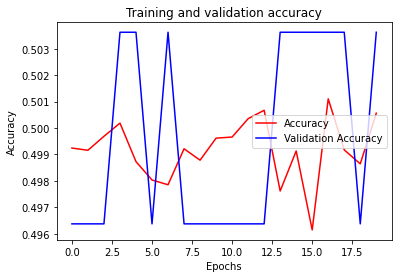

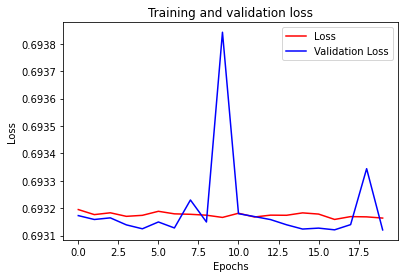

<Figure size 432x288 with 0 Axes>

In [72]:

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()